In [21]:
#I will write a function, that takes in an aminoacid sequence and the positions where this sequence is to sliced. By this, further domain comparisons are made possible
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [22]:
#fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
#fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv'
fpath = '../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv'
df = dc.norm(pd.read_csv(fpath))


In [23]:
DNA_domain2 = doc.slice_domain(df, start=102, end=292)
DNA_domain2

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position_mut,AS_old,AS_new
1919,T102Q,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.122857,1.0,102,T,Q
1920,T102P,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.278521,1.0,102,T,P
1921,T102R,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.355659,1.0,102,T,R
1922,T102Y,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.305714,1.0,102,T,Y
1923,T102V,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.087328,1.0,102,T,V
...,...,...,...,...,...,...,...
5543,K292F,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.275688,1.0,292,K,F
5544,K292E,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.311124,1.0,292,K,E
5545,K292N,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.354957,1.0,292,K,N
5546,K292A,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.115193,1.0,292,K,A


In [24]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [25]:
t1_mean = t1_domain.mean().rename('mean')

t2_mean = t2_domain.mean().rename('mean')

pr_mean = pr_domain.mean().rename('mean')

dna_mean = dna_domain.mean().rename('mean')

tetra_mean = tetra_domain.mean().rename('mean')

reg_mean = reg_domain.mean().rename('mean')

## Distribution and Heatmaps
### Transactivation Domain 1

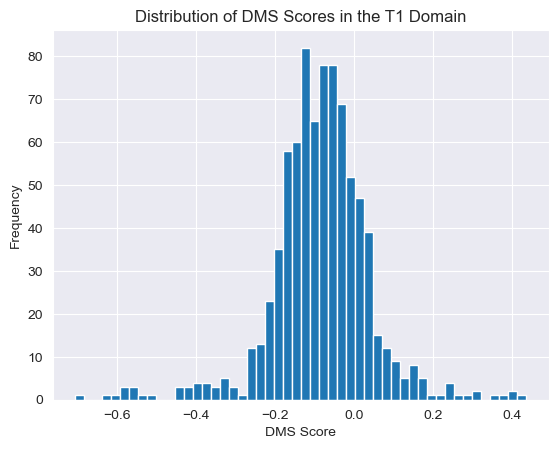

-0.08616622359788895
-0.08158239130040634


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

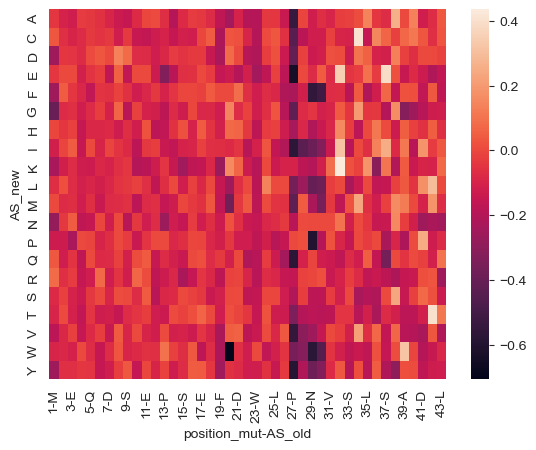

In [26]:

dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

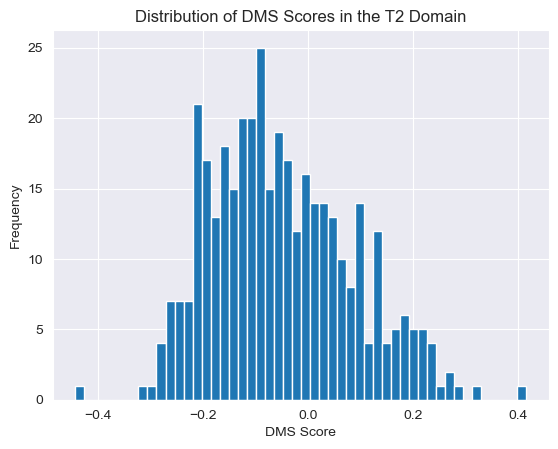

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

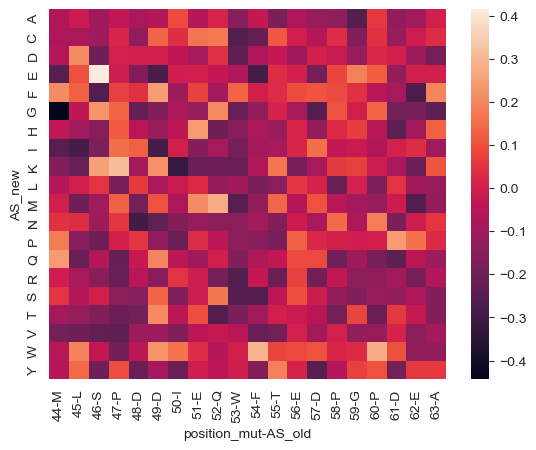

In [27]:

dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()

sns.heatmap(t2_domain)

### Proline-rich Region

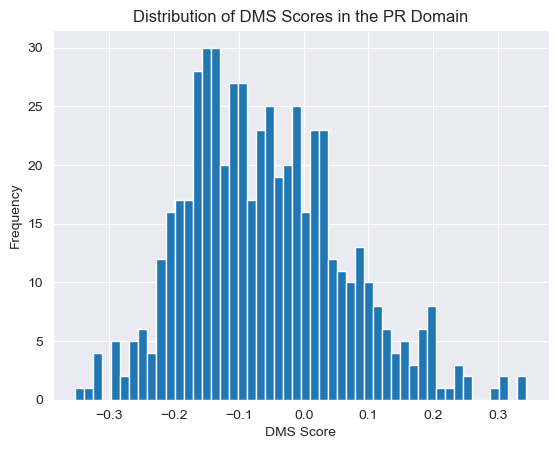

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

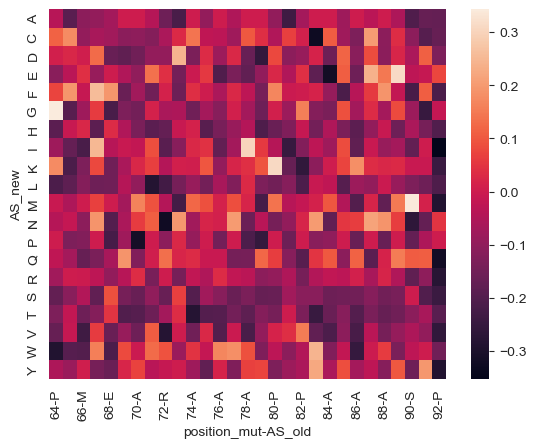

In [28]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()

sns.heatmap(pr_domain)

### DNA Binding Domain

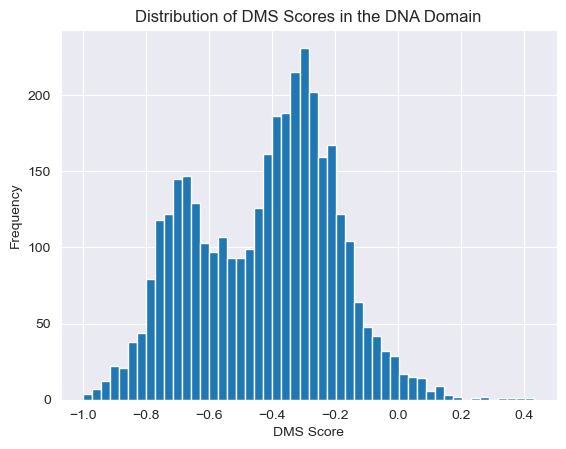

-0.42644774314462786
-0.3913944168729907


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

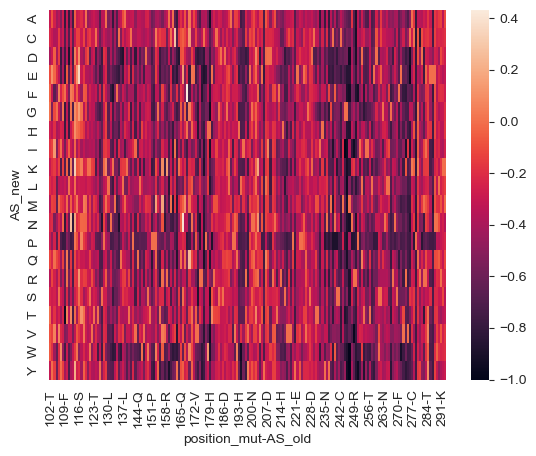

In [29]:

dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())

sns.heatmap(dna_domain)

### Tetramerization Domain

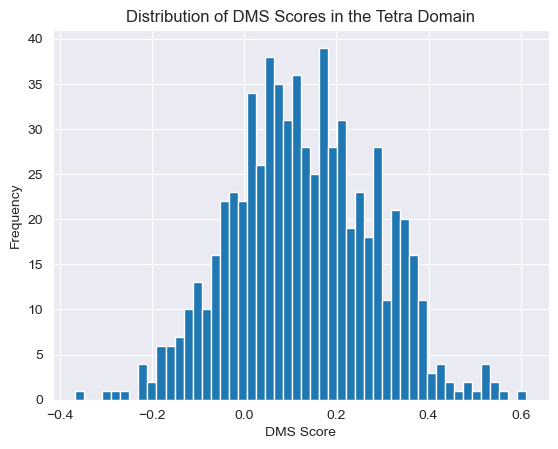

0.12855950738089725
0.12220679237887633


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

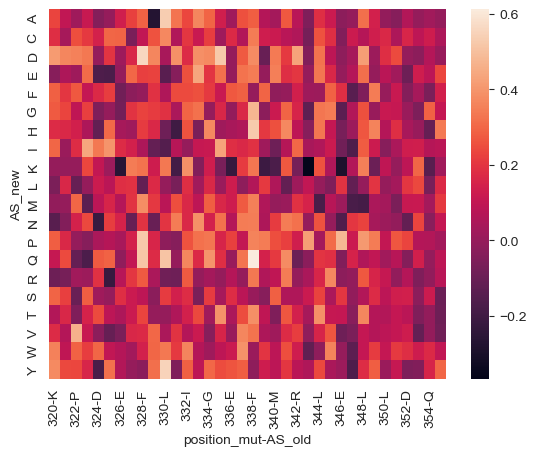

In [30]:

dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

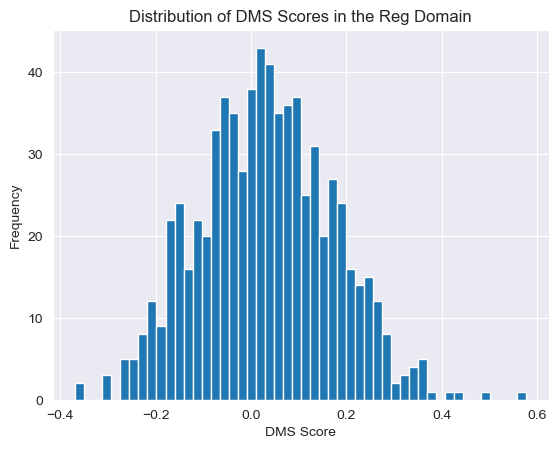

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

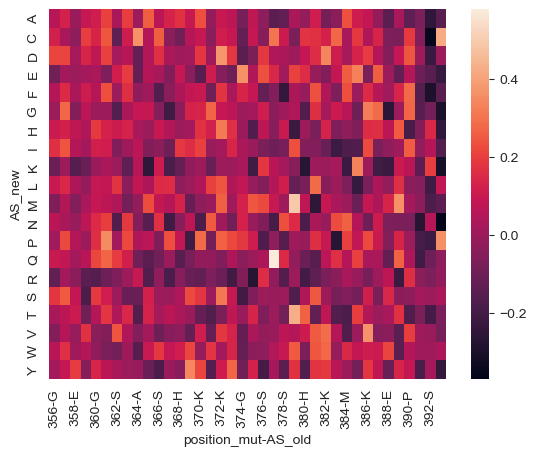

In [31]:

dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=50)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()

sns.heatmap(reg_domain)

## Comparing all DMS score distributions

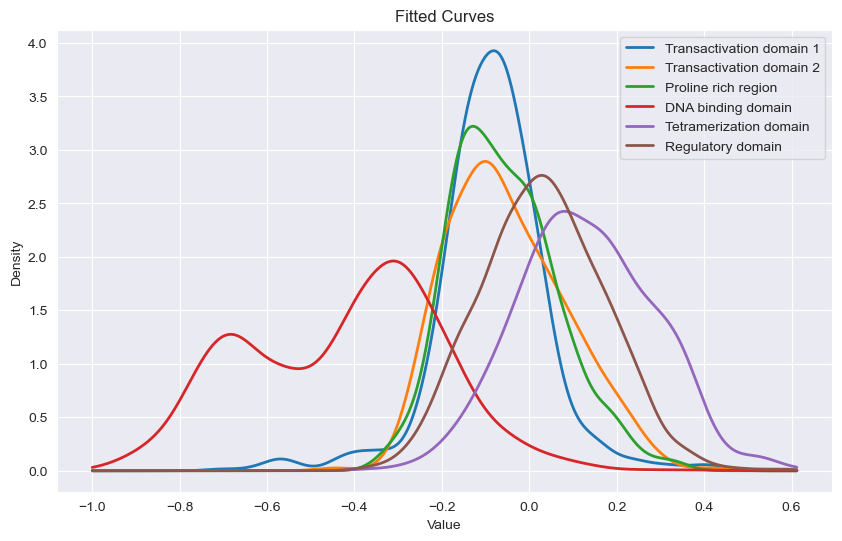

In [32]:
# Combine all datasets
all_dms_scores = np.concatenate((dms_scores_t1, dms_scores_t2, dms_scores_pr,
                                 dms_scores_dna, dms_scores_tetra, dms_scores_reg))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate over each dataset and fit a curve
datasets = ['Transactivation domain 1', 'Transactivation domain 2', 'Proline rich region',
            'DNA binding domain', 'Tetramerization domain', 'Regulatory domain']
for data, label in zip([dms_scores_t1, dms_scores_t2, dms_scores_pr,
                        dms_scores_dna, dms_scores_tetra, dms_scores_reg], datasets):
    # Fit a curve to the data using KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(np.min(all_dms_scores), np.max(all_dms_scores), 1000)
    y_vals = kde(x_vals)

    # Plot the fitted curve with label
    ax.plot(x_vals, y_vals, linewidth=2, label=label)

# Add labels, title, and legend
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Fitted Curves')
ax.legend()

# Show the plot
plt.show()

## Standard deviation


In [33]:

t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

,t1_std,t2_std,pr_std,dna_std,tetra_std,reg_std
0,0.066115,0.036843,0.037016,0.158844,0.066383,0.050188


## Mean value matrix

<Axes: xlabel='AS_new', ylabel='AS_old'>

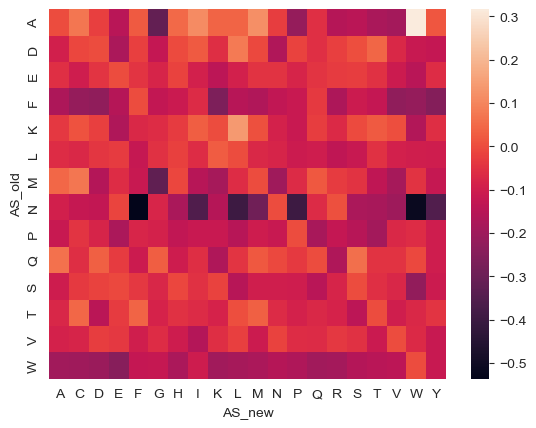

In [34]:
import seaborn as sns
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

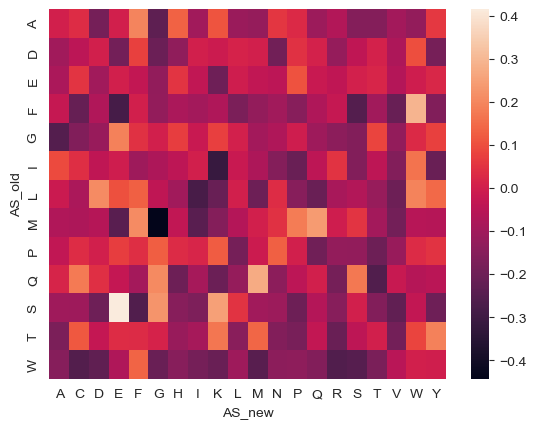

In [35]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

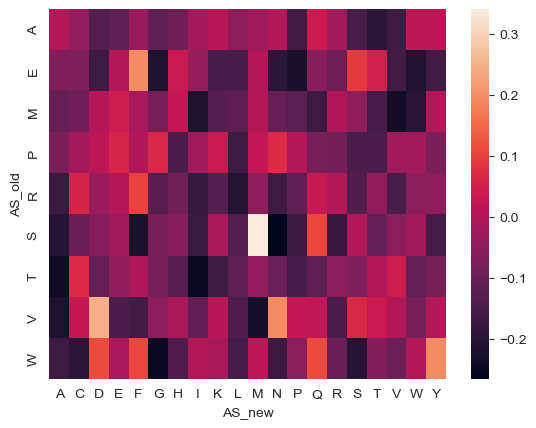

In [36]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

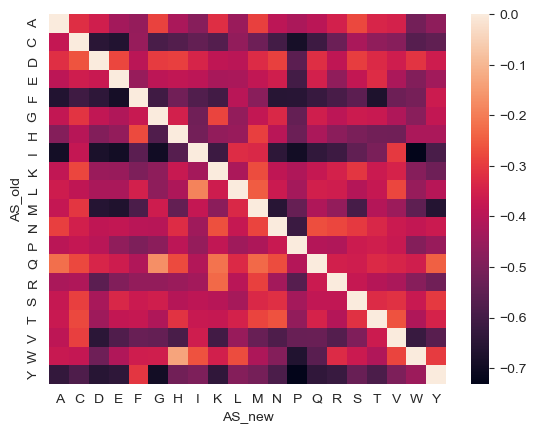

In [37]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

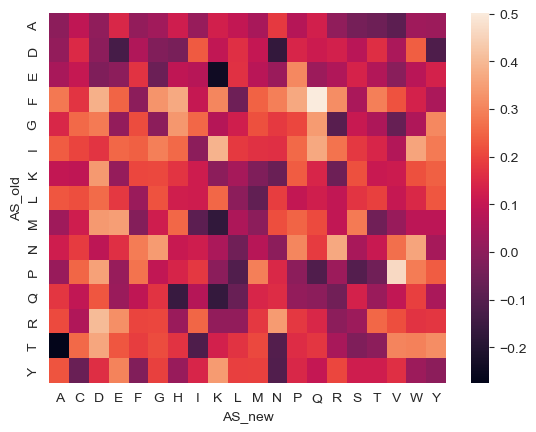

In [38]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

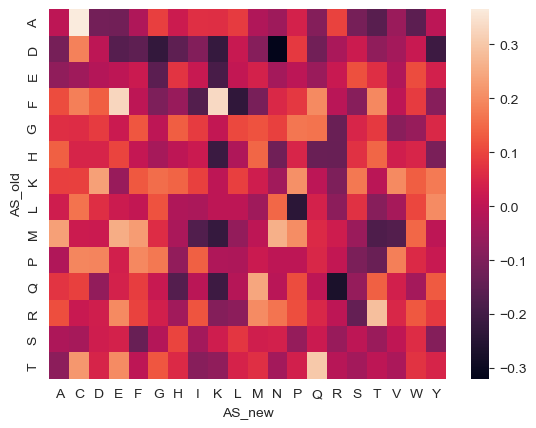

In [39]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))

## Shapiro Wilk test

In [40]:

print('T1 Domain')
print(doc.test_normality(t1_list['DMS_score']))

print('T2 Domain')
print(doc.test_normality(t2_list['DMS_score']))

print('PR Domain')
print(doc.test_normality(pr_list['DMS_score']))

print('DNA Domain')
print(doc.test_normality(dna_list['DMS_score']))

print('Tetra Domain')
print(doc.test_normality(tetra_list['DMS_score']))

print('Reg Domain')
print(doc.test_normality(reg_list['DMS_score']))

T1 Domain
{'statistic': 0.9310328364372253, 'p-value': 6.08287270871935e-19, 'is_normal': False}
T2 Domain
{'statistic': 0.9808474183082581, 'p-value': 6.2129161960911e-05, 'is_normal': False}
PR Domain
{'statistic': 0.982645571231842, 'p-value': 3.8885495996510144e-06, 'is_normal': False}
DNA Domain
{'statistic': 0.9822250604629517, 'p-value': 5.959267222876651e-21, 'is_normal': False}
Tetra Domain
{'statistic': 0.9975303411483765, 'p-value': 0.40572646260261536, 'is_normal': True}
Reg Domain
{'statistic': 0.997413694858551, 'p-value': 0.31858399510383606, 'is_normal': True}
